<a href="https://colab.research.google.com/github/Nandini37/Python_ML_AI/blob/main/Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ps4e9-original-data-loan-approval-prediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5796052%2F9519882%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241001%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241001T180307Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc8d811a91d2f5718e3269db0c3ce681cee05023ef79658f58ad5ad7bb367638dc6f1f0804a0b1d8df61d2857d3279a3b7fb21b38caf56dfbb1562da10aaf63849e7fa20ec19fc15d8ace5953cdd4f9b12be2b21ab3cc8ce8ae0b42d65687d6028f6d748ef25dd2b456a76d4c420971390d94209d08b2dfb5ec2fbe59109ac90da9fdccbce28eda8798b2100c0c6294d57800819d5a2e405fc98ed19b0223a7a72067ef2d6750721b6be2b4de9dad150554c8678a0689385f24e09ed111c00c4848879fc876d740ca030495fa0df43f05332cdd5386ab42f8d10c2d2a371a85e31b5f1284031b711cf3cb932dd6a1f49e655a378813323b2c5154982b007db091'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 376518 bytes downloaded
Downloaded and uncompressed: ps4e9-original-data-loan-approval-prediction
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ps4e9-original-data-loan-approval-prediction/credit_risk_dataset.csv


In [3]:
df = pd.read_csv("/kaggle/input/ps4e9-original-data-loan-approval-prediction/credit_risk_dataset.csv")

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.shape

(32581, 12)

In [6]:
df.describe

<bound method NDFrame.describe of        person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [14]:


from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains categorical data (object dtype)
    if df[column].dtype == 'object':
        # Fit the LabelEncoder to the unique values in the column and transform the column
        df[column] = le.fit_transform(df[column])

# The encoded DataFrame
df.head()


# Explanation of Encoding:
# In the provided code, we use LabelEncoder from the scikit-learn library to perform label encoding on categorical data.
# Here's a breakdown of the process:
# 1. **Import LabelEncoder:** `from sklearn.preprocessing import LabelEncoder`
# 2. **Create a LabelEncoder object:** `le = LabelEncoder()`
# 3. **Iterate through columns:** We loop through each column in the DataFrame `df`.
# 4. **Check for categorical data:** We use `df[column].dtype == 'object'` to identify columns with object (string) data types, which usually represent categorical variables.
# 5. **Fit and Transform:** For each categorical column:
#     - `le.fit_transform(df[column])`:
#       - `fit`: The LabelEncoder learns the unique values present in the column.
#       - `transform`: It replaces the original categorical values with numerical labels (integers) based on the learned mapping.
# 6. **Update DataFrame:** The encoded numerical values are then assigned back to the corresponding column in the `df` DataFrame.


# By performing label encoding, we transform categorical data into a numerical representation that machine learning algorithms can understand and process effectively.
# It's important to note that label encoding might introduce ordinal relationships between categories (e.g., 0 < 1 < 2), which might not be appropriate for all categorical features.
# In cases where the order of categories is not meaningful, other encoding techniques like one-hot encoding might be more suitable.


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


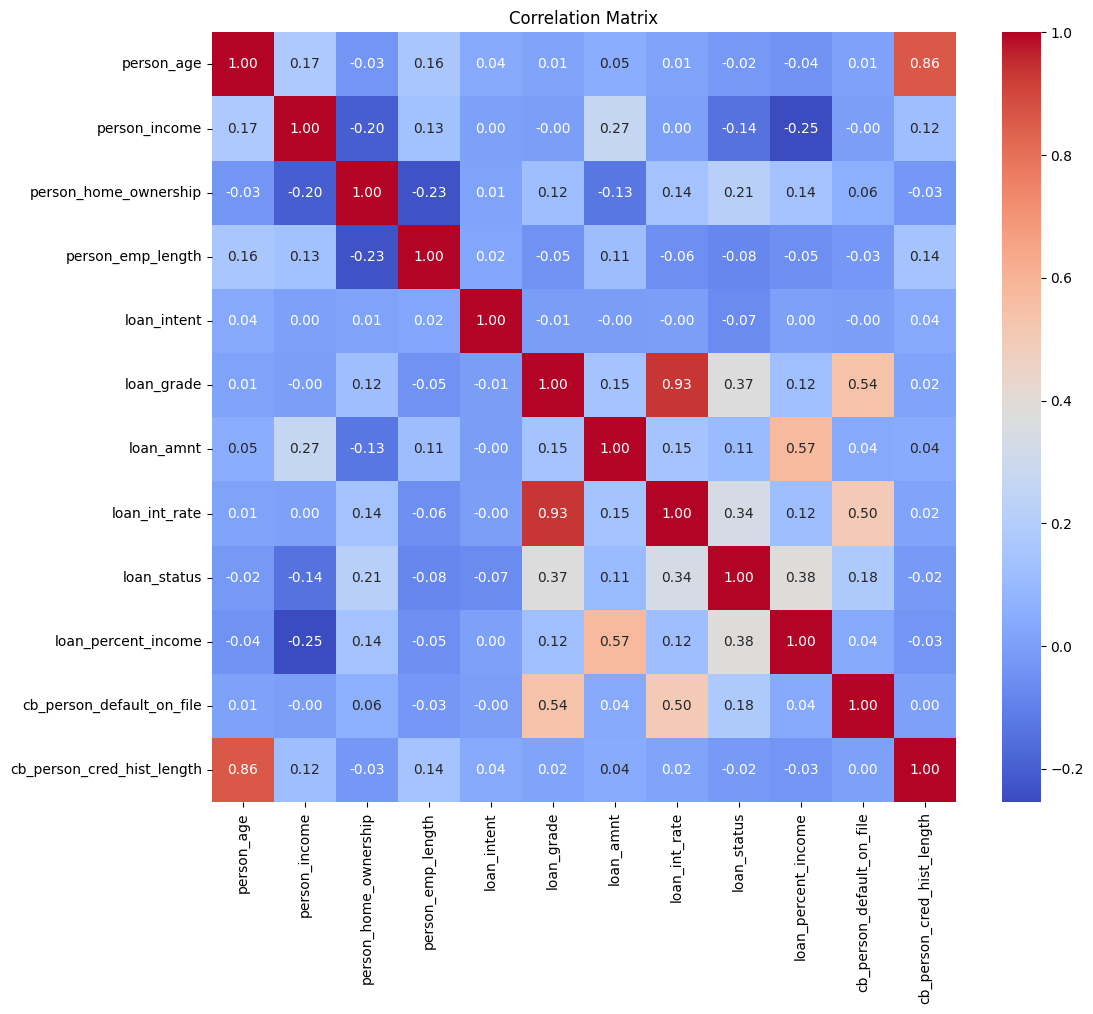

In [16]:


import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap visualization
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [21]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [20]:
from re import X
from sklearn.model_selection import train_test_split

df2 = df[['person_age', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]

X = df2.drop('cb_person_default_on_file',axis =1)
Y =


ModuleNotFoundError: No module named 'sckitlearn'